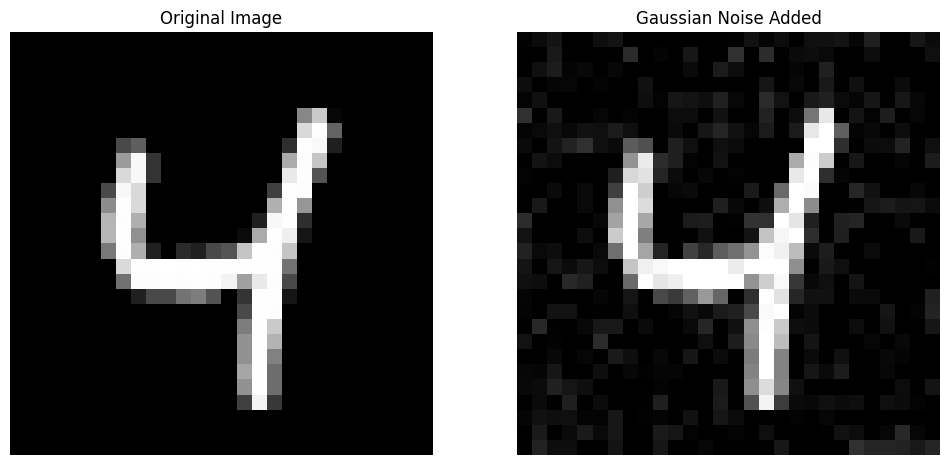

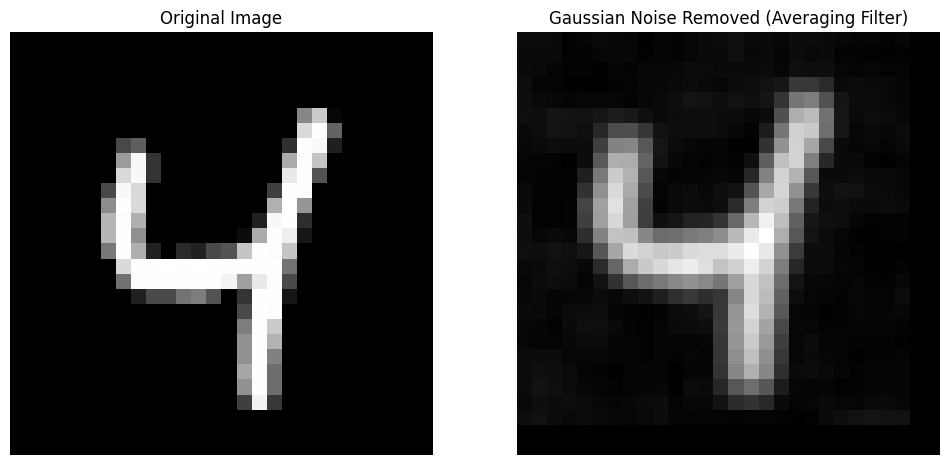

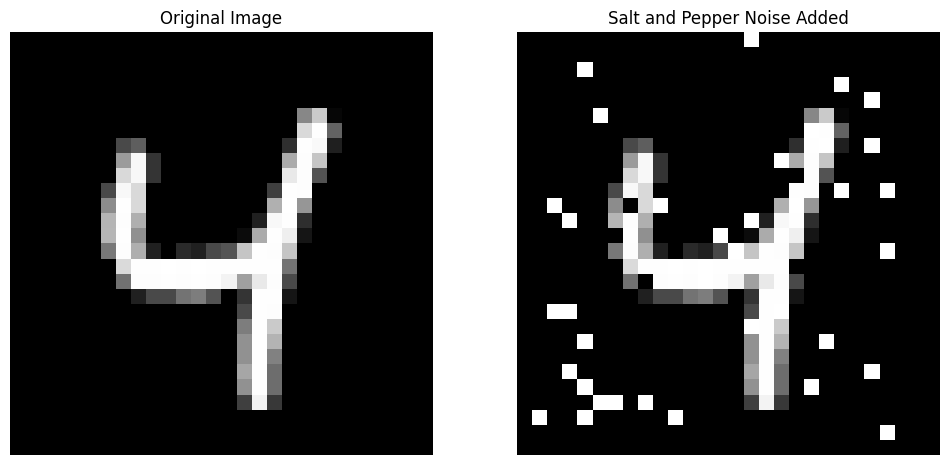

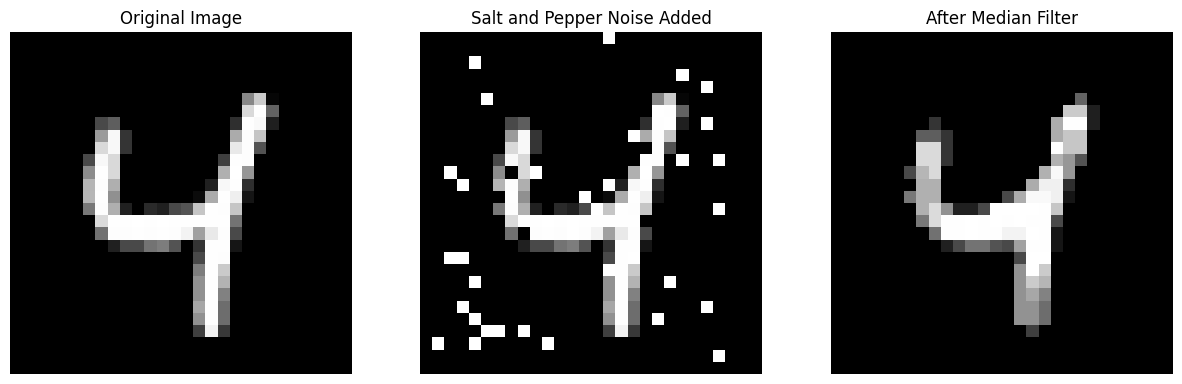

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv('mnist_train.csv')
test = pd.read_csv('mnist_test.csv')

image_index = np.random.randint(0, test.shape[0])
image_gray = test.iloc[image_index, 1:].values.reshape(28, 28).astype(np.uint8)
rows, cols = image_gray.shape



mean_value = 0
standard_dev = 20
gaussian_noise = np.random.normal(mean_value, standard_dev, (rows, cols))
noise_image = np.zeros((rows, cols), dtype='uint8')
for x in range(rows):
    for y in range(cols):
        noise_image[x][y] = np.clip(image_gray[x][y] + gaussian_noise[x][y], 0, 255)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gaussian Noise Added")
plt.imshow(noise_image, cmap='gray')
plt.axis('off')
plt.show()

filter_size = 3
filter_mask = np.ones((filter_size, filter_size)) / (filter_size ** 2)

def apply_filter(img, mask):
    h, w = img.shape
    mh, mw = mask.shape
    filtered_img = np.zeros((h, w))

    for r in range(h - mh + 1):
        for c in range(w - mw + 1):
            region = img[r:r + mh, c:c + mw] * mask
            filtered_img[r, c] = region.sum()

    return np.clip(filtered_img, 0, 255).astype('uint8')

restored_image = apply_filter(noise_image, filter_mask)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gaussian Noise Removed (Averaging Filter)")
plt.imshow(restored_image, cmap='gray')
plt.axis('off')
plt.show()

def salt_pepper_noise(img, prob_salt, prob_pepper):
    noisy_img = np.copy(img)
    num_salt = np.ceil(prob_salt * img.size)
    salt_locs = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
    noisy_img[salt_locs[0], salt_locs[1]] = 255

    num_pepper = np.ceil(prob_pepper * img.size)
    pepper_locs = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
    noisy_img[pepper_locs[0], pepper_locs[1]] = 0

    return noisy_img

salt_probability = 0.05
pepper_probability = 0.05
sp_noise_image = salt_pepper_noise(image_gray, salt_probability, pepper_probability)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Salt and Pepper Noise Added")
plt.imshow(sp_noise_image, cmap='gray')
plt.axis('off')
plt.show()

def median_filtering(img, filter_sz=3):
    img_height, img_width = img.shape
    padding = filter_sz // 2

    padded_img = np.pad(img, padding, mode='constant', constant_values=0)
    result_img = np.zeros_like(img)

    for r in range(padding, img_height + padding):
        for c in range(padding, img_width + padding):
            patch = padded_img[r - padding:r + padding + 1, c - padding:c + padding + 1]
            median_value = np.median(patch.flatten())
            result_img[r - padding, c - padding] = median_value

    return result_img

filtered_sp_noise_img = median_filtering(sp_noise_image, filter_sz=3)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Salt and Pepper Noise Added")
plt.imshow(sp_noise_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("After Median Filter")
plt.imshow(filtered_sp_noise_img, cmap='gray')
plt.axis('off')
plt.show()


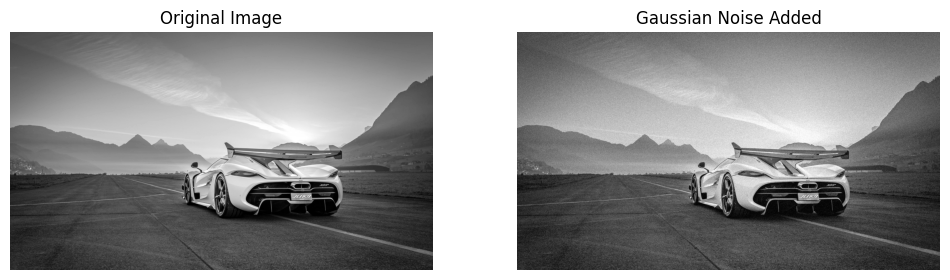

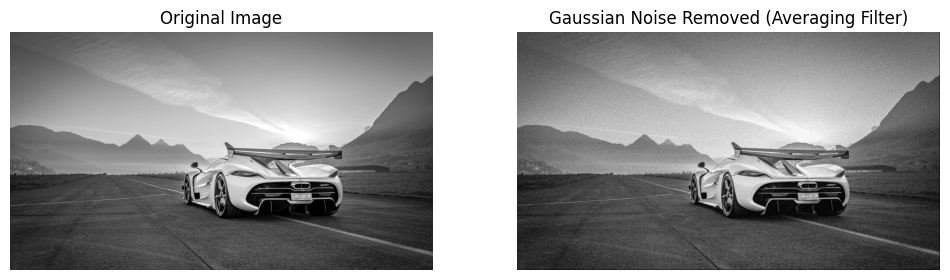

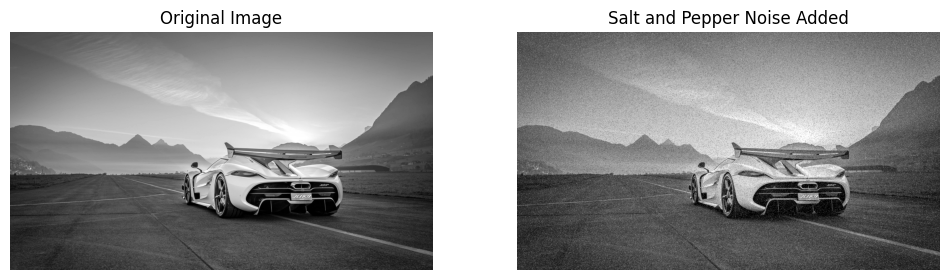

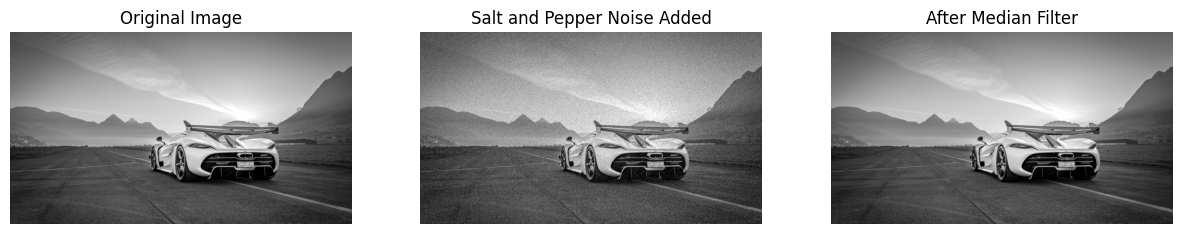

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("1.jpg")
image_gray = image.convert('L')
image_gray = np.array(image_gray)
rows, cols = image_gray.shape

mean_value = 0
standard_dev = 20
gaussian_noise = np.random.normal(mean_value, standard_dev, (rows, cols))
noise_image = np.zeros((rows, cols), dtype='uint8')
for x in range(rows):
    for y in range(cols):
        noise_image[x][y] = np.clip(image_gray[x][y] + gaussian_noise[x][y], 0, 255)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gaussian Noise Added")
plt.imshow(noise_image, cmap='gray')
plt.axis('off')
plt.show()

filter_size = 3
filter_mask = np.ones((filter_size, filter_size)) / (filter_size ** 2)

def apply_filter(img, mask):
    h, w = img.shape
    mh, mw = mask.shape
    filtered_img = np.zeros((h, w))

    for r in range(h - mh + 1):
        for c in range(w - mw + 1):
            region = img[r:r + mh, c:c + mw] * mask
            filtered_img[r, c] = region.sum()

    return np.clip(filtered_img, 0, 255).astype('uint8')

restored_image = apply_filter(noise_image, filter_mask)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gaussian Noise Removed (Averaging Filter)")
plt.imshow(restored_image, cmap='gray')
plt.axis('off')
plt.show()

def salt_pepper_noise(img, prob_salt, prob_pepper):
    noisy_img = np.copy(img)
    num_salt = np.ceil(prob_salt * img.size)
    salt_locs = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape]
    noisy_img[salt_locs[0], salt_locs[1]] = 255

    num_pepper = np.ceil(prob_pepper * img.size)
    pepper_locs = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape]
    noisy_img[pepper_locs[0], pepper_locs[1]] = 0

    return noisy_img

salt_probability = 0.05
pepper_probability = 0.05
sp_noise_image = salt_pepper_noise(image_gray, salt_probability, pepper_probability)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Salt and Pepper Noise Added")
plt.imshow(sp_noise_image, cmap='gray')
plt.axis('off')
plt.show()

def median_filtering(img, filter_sz=3):
    img_height, img_width = img.shape
    padding = filter_sz // 2

    padded_img = np.pad(img, padding, mode='constant', constant_values=0)
    result_img = np.zeros_like(img)

    for r in range(padding, img_height + padding):
        for c in range(padding, img_width + padding):
            patch = padded_img[r - padding:r + padding + 1, c - padding:c + padding + 1]
            median_value = np.median(patch.flatten())
            result_img[r - padding, c - padding] = median_value

    return result_img

filtered_sp_noise_img = median_filtering(sp_noise_image, filter_sz=3)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Salt and Pepper Noise Added")
plt.imshow(sp_noise_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("After Median Filter")
plt.imshow(filtered_sp_noise_img, cmap='gray')
plt.axis('off')
plt.show()
